## Reading video and images

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

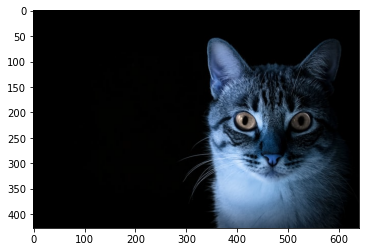

In [2]:
img=cv.imread('Resources/Photos/cat.jpg')
plt.imshow(img)

In [3]:
capture=cv.VideoCapture('Resources/Videos/dog.mp4')

In [4]:
while True:
    isTrue,frame=capture.read()
    cv.imshow('Video',frame)
    if cv.waitKey(20) & 0xff==ord('d'):
        break
capture.release()
cv.destroyAllWindows()
    

## Resizing and Rescaling  Frames

In [5]:
def rescaleFrame(frame, scale=0.75):
    #images,videos live videos
    width=int(frame.shape[1]*scale)#New width
    height=int(frame.shape[0]*scale)#New height
    dimensions=(width,height)#New dimensions
    return cv.resize(frame,dimensions,interpolation=cv.INTER_AREA)#Opencv resize method

In [6]:
capture=cv.VideoCapture('Resources/Videos/dog.mp4')
while True:
    isTrue,frame=capture.read()
    frame_resized=rescaleFrame(frame)
    cv.imshow('Video Resized',frame_resized)
    cv.imshow('Video',frame)
    if cv.waitKey(20) & 0xff==ord('d'):
        break
capture.release()
cv.destroyAllWindows()

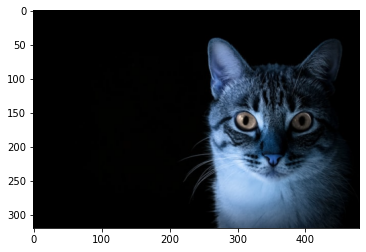

In [7]:
resized_image=rescaleFrame(img)
plt.imshow(resized_image);

In [8]:
#live video
def changeResolution(width,height):
    capture.set(3,width)
    capture.set(4,height)

## Draw On Image

In [9]:
import numpy as np
import matplotlib.pyplot as plt

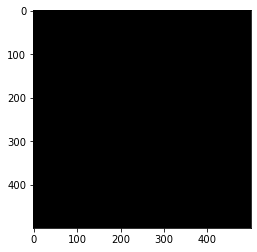

In [10]:
blank=np.zeros((500,500,3),dtype='uint8')
plt.imshow(blank)
#uint8 is a data type indicates images

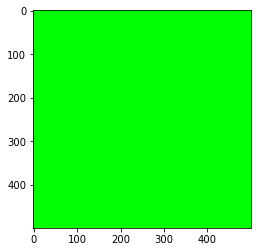

In [11]:
#Paint the image certain colour
blank[:]=0,255,0
plt.imshow(blank)

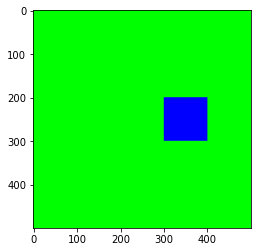

In [12]:
blank[200:300 , 300:400]=0,0,255#Paints between in horizontal axis 300 and 400;in vertical axis 200 and 300 
plt.imshow(blank)

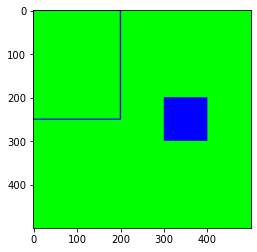

In [13]:
#2.Draw a rectangle
cv.rectangle(blank,(0,0),(200,250),(0,0,250),thickness=2)
plt.imshow(blank)

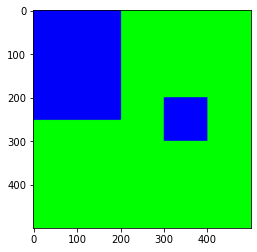

In [14]:
cv.rectangle(blank,(0,0),(200,250),(0,0,250),thickness=cv.FILLED)
plt.imshow(blank)

In [15]:
#Draw A Circle

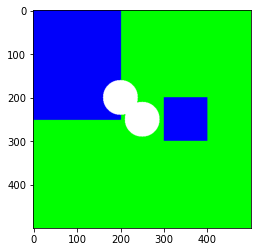

In [22]:
cv.circle(blank,(blank.shape[0]//2,blank.shape[0]//2),40,(255,255,255),thickness=cv.FILLED)
plt.imshow(blank)

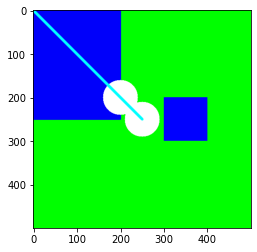

In [28]:
#Draw a line
cv.line(blank,(0,0),(250,250),(0,255,255),thickness=5)##Line starts from (0,0) and ends in 255,255
plt.imshow(blank)

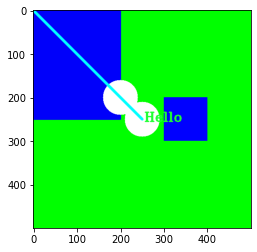

In [35]:
#Write text on an image
cv.putText(blank,'Hello',(255,255),cv.FONT_HERSHEY_TRIPLEX,1.0,(30,255,50),thickness=2)
plt.imshow(blank)

## Basic Functions OpenCV

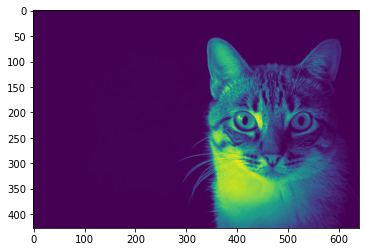

In [36]:
#Converting an BGR image to GrayScale image
gray_scale=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray_scale)

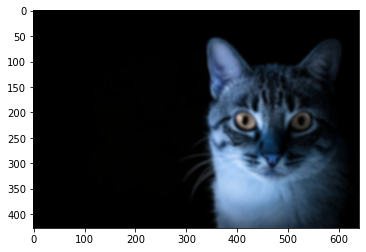

In [37]:
#Blur image
blur=cv.GaussianBlur(img,(7,7),cv.BORDER_DEFAULT)
plt.imshow(blur)

The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images.

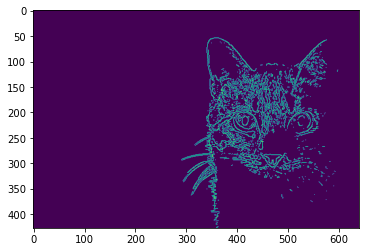

In [41]:
#Canny image
canny=cv.Canny(img,175,175)
plt.imshow(canny)

<b>Dilation</b> adds pixels to boundaries of an image,while erosion removes pixels on object boundaries. The number of pixels added or removed from the objects in an image depends on the size and shape of the structuring element used to process the image 

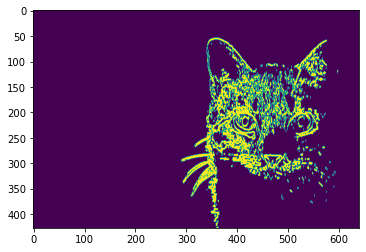

In [44]:
#Dilating the image
dilated=cv.dilate(canny,(7,7),iterations=3)
plt.imshow(dilated)

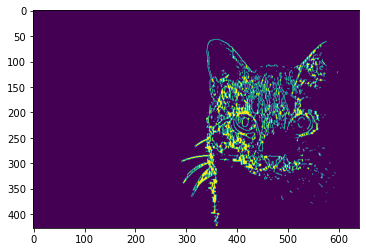

In [46]:
#Erode
eroded=cv.erode(dilated,(3,3),iterations=3)
plt.imshow(eroded)

We can crop an image by thinking as an array. Then we can split this array.

## Affine Transformation


<ul>
<li>An affine transformation is any transformation that preserves collinearity, parallelism as well as the ratio of distances between the points (e.g. midpoint of a line remains the midpoint after transformation). It doesn’t necessarily preserve distances and angles.</li>
<li>Thus all the geometric transformations we discussed so far such as translation, rotation, scaling, etc are all affine transformations as all the above properties are preserved in these transformations. To understand in simple terms, one can think of the affine transformation as a composition of rotation, translation, scaling, and shear.</li>
</ul>

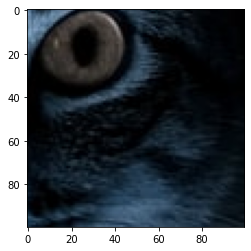

In [48]:
#Crop
cropped=img[200:300,500:600]
plt.imshow(cropped)

## Image Translation

<b>-x</b>:Left<br>
<b>-y</b>:Up<br>
<b>x</b>:Right<br>
<b>y</b>:Down<br>
Translation is basically shifting an image along the x and y axis

In [64]:
print(img.shape)

(427, 640, 3)


In [65]:
def translate(image,x,y):
    transMatrix=np.float32([[1,0,x],[0,1,y]])#Our translation matrix
    dimensions=(image.shape[1],image.shape[0])
    return cv.warpAffine(image,transMatrix,dimensions)

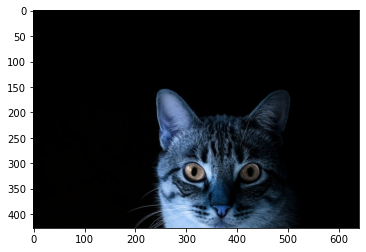

In [67]:
translatedImage=translate(img,-100,100)
plt.imshow(translatedImage)

## Image Rotation 
Rotating an image by some angle

In [68]:
def rotate(image,angle,rotPoint=None):
    (height,width)=img.shape[:2]
    if rotPoint is None:
        rotPoint=(width//2,height//2)
    rotationMatrix=cv.getRotationMatrix2D(rotPoint,angle,1.0)
    dimensions=(width,height)
    return cv.warpAffine(image,rotationMatrix,dimensions)


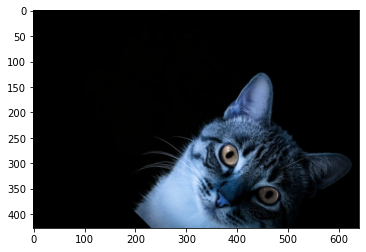

In [70]:
rotated=rotate(img,-45)
plt.imshow(rotated)

## Resizing an image


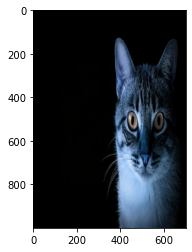

In [74]:
#resized=cv.resize(img,(500,500),interpolation=cv.INTER_CUBIC)
#plt.imshow(resized)
resized=cv.resize(img,(700,1000),interpolation=cv.INTER_CUBIC)
plt.imshow(resized)

## Flipping

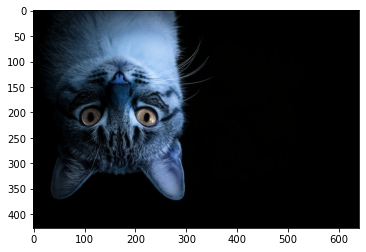

In [75]:
flipped_image=cv.flip(img,-1)
plt.imshow(flipped_image)

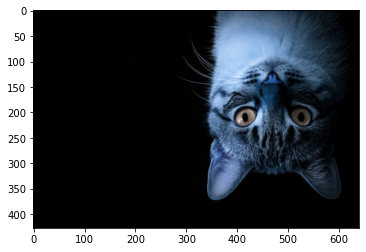

In [76]:
flipped_image=cv.flip(img,0)
plt.imshow(flipped_image)

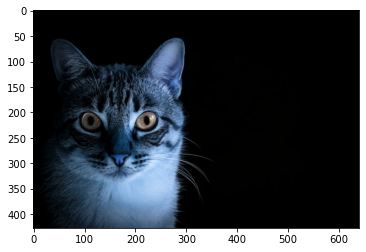

In [77]:
flipped_image=cv.flip(img,1)
plt.imshow(flipped_image)

## Cropping

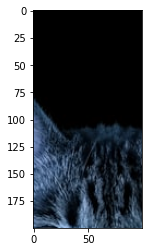

In [79]:
cropped_image=img[0:200,400:500]
plt.imshow(cropped_image)